In [1]:
import sys
sys.path.insert(0, '/Users/jetchung/Desktop/Github Repositories/3D-Assignment-Problem/3DAssignmentSolver')


from main import Solver
from gurobi_solver import GurobiSolver
from pulp_solver import PulpSolver
from utils import create_problems, benchmark

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
N = 20
num_problems = 10

problems = create_problems(N, num_problems, verbosity = False)

solver1 = Solver(learning_rate_scale="constant", algorithm="subgradient", beta=0, search_size=10, learning_rate=0.1, max_iterations=200, threshold=0.05)
solver2 = Solver(learning_rate_scale="1/k", algorithm="nesterov", beta=0.95, search_size=10, learning_rate=0.1, max_iterations=200, threshold=0.05)
solver3 = PulpSolver()
solver4 = GurobiSolver('/Users/jetchung/gurobi.json')


solvers = [solver1, solver2, solver3, solver4]

df = benchmark(problems, solvers, verbosity = False)

In [3]:
df

,CustomSolver_1,CustomSolver_2,PulpSolver_3,GurobiSolver_4
1,0.069310,0.119555,7.381567,2.278906
2,0.063042,0.107529,6.288208,1.099159
3,0.131299,0.020341,4.324036,1.028871
4,0.109403,0.021729,5.309593,1.595306
5,0.078151,0.025803,6.178527,1.121392
6,0.063832,0.032168,3.638092,1.092132
7,0.034203,0.035927,4.040035,0.954479
8,0.063583,0.023924,2.988238,2.281033
9,0.096014,0.073397,3.468855,1.423467
10,0.044899,0.019299,1.689962,1.650908


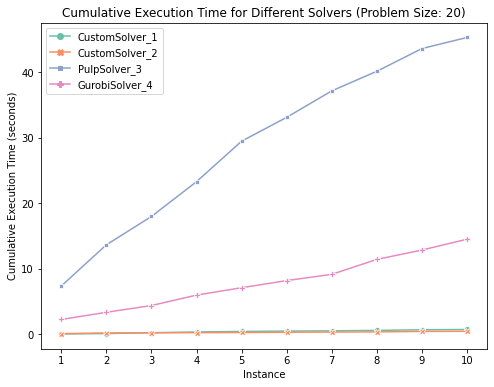

In [4]:
plt.figure(figsize=(8, 6))

sns.lineplot(data=df.cumsum(), dashes=False, markers = True, palette="Set2")

plt.xlabel("Instance")
plt.xticks(np.arange(1, num_problems + 1, 1)) 
plt.ylabel("Cumulative Execution Time (seconds)")
plt.title(f"Cumulative Execution Time for Different Solvers (Problem Size: {N})")
plt.legend()
plt.show()

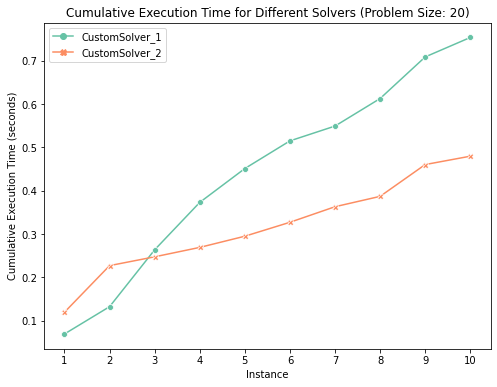

In [5]:
df_subset = df.iloc[:, :2] 

plt.figure(figsize=(8, 6))

sns.lineplot(data=df_subset.cumsum(), dashes=False, markers = True, palette="Set2")

plt.xlabel("Instance")
plt.xticks(np.arange(1, num_problems + 1, 1)) 
plt.ylabel("Cumulative Execution Time (seconds)")
plt.title(f"Cumulative Execution Time for Different Solvers (Problem Size: {N})")
plt.legend()
plt.show()

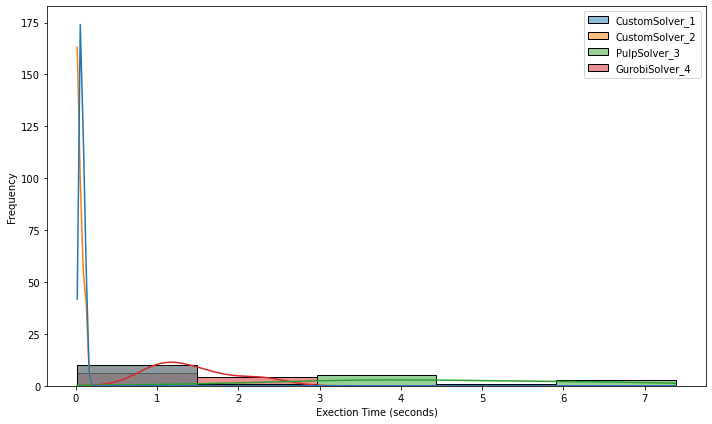

In [6]:

plt.figure(figsize=(10, 6))
plt.xlabel("Exection Time (seconds)")
plt.ylabel("Frequency")
sns.histplot(data=df, bins=5, kde=True, alpha=0.5)
plt.tight_layout()
plt.show()